<h1>Battle of Neighborhood Week #1</h1>

<h2>Introduction & Business Problem :</h2>

<a href="https://colab.research.google.com/drive/1lme-_B4FSkGOYzUM61MQ4DugbJAGVgEk?usp=sharing">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<h3>Problem Background :</h3>
<p1>If you have ever considered making a change and moving to live near MRT Station, you have probably, at some point, considered a variety of factors to determine where best to move. There are a lot of factors about where you live that can affect your quality of life and your happiness. One of most important factor is neighborhoods around the stations should be suitable with your needs and people needs might be different. For example if you are yoga enthusiast, you might be consider to live near yoga studio, or if you are movie addict, you might be consider to live near cinema, and so on.</p1>

<p2>Nancy is my friend. She is a healthy girl. She start her morning routine with something healthy like apple vinegar, ant then she prepares her meal and go to coffee shop to drink coffee and do some exercise in a fitness center before she goes to work. Her office is close to MRT Station, so she uses MRT as her mode of transportation.  
Now her rent is almost over, she want to moves to another place that might as match as she wants. But she had no idea where should be. She need some recomendation based on her preferenced venues. So where Nancy should live?</p2>

<p3>Therefore, for this capstone project, I will create a <b>recommender system by finding similarities of the Nancy's needs and then match them with any station that has nearby venue by using the cosine of similarity technique.</b> So Nancy will get a list of recommended places to live around the MRT Station based on their preference.</p3>

<h3>Data</h3>

Data will be used here :
<ol><li>List of MRT Station in Jakarta in MRT Jakarta Official Web Page.</li>
<li>Fetch Latitude and Longitude using Geopy as course before.</li>
<li>Fetch all of categories venue using Foursquare API.</li>
<li>List of preference venue from Nancy.</li>
</ol>

In [1451]:
#Importing ....
import pandas as pd
import requests
from bs4 import BeautifulSoup
import folium
from pandas import json_normalize
from foursquare_account import CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT ##client secret not showing here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

<h4>Scraping official MRT website to get lists all of MRT Station in Jakarta</h4>

In [158]:
scrap_url = requests.get('https://jakartamrt.co.id/id/daftar-stasiun').text
soup = BeautifulSoup(scrap_url,'html')

<h5>Find Pattern from official MRT Jakarta to get all of list station name</h5>

In [159]:
soup.find('ul',{'class':"station-list"}).find_all('span')
#Pattern recognised, we should clean them!

[<span>Stasiun Lebak Bulus Grab</span>,
 <span>Stasiun Fatmawati</span>,
 <span>Stasiun Cipete Raya</span>,
 <span>Stasiun Haji Nawi</span>,
 <span>Stasiun Blok A</span>,
 <span>Stasiun Blok M BCA</span>,
 <span>Stasiun ASEAN</span>,
 <span>Stasiun Senayan</span>,
 <span>Stasiun Istora Mandiri</span>,
 <span>Stasiun Bendungan Hilir</span>,
 <span>Stasiun Setiabudi Astra</span>,
 <span>Stasiun Dukuh Atas BNI</span>,
 <span>Stasiun Bundaran HI</span>]

In [291]:
station_name = []
for xtx in soup.find('ul',{'class':"station-list"}).find_all('span'):
    station_name.append(xtx.contents[0].strip())

station_name

['Stasiun Lebak Bulus Grab',
 'Stasiun Fatmawati',
 'Stasiun Cipete Raya',
 'Stasiun Haji Nawi',
 'Stasiun Blok A',
 'Stasiun Blok M BCA',
 'Stasiun ASEAN',
 'Stasiun Senayan',
 'Stasiun Istora Mandiri',
 'Stasiun Bendungan Hilir',
 'Stasiun Setiabudi Astra',
 'Stasiun Dukuh Atas BNI',
 'Stasiun Bundaran HI']

In [264]:
df_station = pd.DataFrame(station_name, columns=['Station Name'] )
df_station

Station Name
0   Stasiun Lebak Bulus Grab
1          Stasiun Fatmawati
2        Stasiun Cipete Raya
3          Stasiun Haji Nawi
4             Stasiun Blok A
5         Stasiun Blok M BCA
6              Stasiun ASEAN
7            Stasiun Senayan
8     Stasiun Istora Mandiri
9    Stasiun Bendungan Hilir
10   Stasiun Setiabudi Astra
11    Stasiun Dukuh Atas BNI
12       Stasiun Bundaran HI

In [336]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import numpy as np

In [337]:
#Finding latitude and Longitude
lats = []
for xux in df_station['Station Name']:
    try :
        lats.append(Nominatim(user_agent='foursquare_agent').geocode(xux).latitude)
    except AttributeError: 
        lats.append(np.nan)
lats
    

[nan,
 -6.2563292,
 -6.3078173,
 nan,
 -6.2563292,
 -6.913684,
 nan,
 -6.2282687,
 nan,
 -6.2072135,
 nan,
 nan,
 -6.1918644]

In [1973]:
longs = []
for yuy in df_station['Station Name']:
    try :
        longs.append(Nominatim(user_agent='foursquare_agent').geocode(yuy).longitude)
    except AttributeError: 
        longs.append(np.nan)
longs


[nan,
 106.7971226,
 106.8389399,
 nan,
 106.7971226,
 107.60255,
 nan,
 106.8004916,
 nan,
 106.7975828,
 nan,
 nan,
 106.822988]

In [403]:
#Creating DataFrame with station, latitude, longitude
df_station['Latitude'] = lats
df_station['Longitude'] = longs

df_station

Station Name  Latitude   Longitude
0   Stasiun Lebak Bulus Grab       NaN         NaN
1          Stasiun Fatmawati -6.256329  106.797123
2        Stasiun Cipete Raya -6.307817  106.838940
3          Stasiun Haji Nawi       NaN         NaN
4             Stasiun Blok A -6.256329  106.797123
5         Stasiun Blok M BCA -6.913684  107.602550
6              Stasiun ASEAN       NaN         NaN
7            Stasiun Senayan -6.228269  106.800492
8     Stasiun Istora Mandiri       NaN         NaN
9    Stasiun Bendungan Hilir -6.207213  106.797583
10   Stasiun Setiabudi Astra       NaN         NaN
11    Stasiun Dukuh Atas BNI       NaN         NaN
12       Stasiun Bundaran HI -6.191864  106.822988

Unfortunately, we've got empty atribute because foursquare might be not completed, if choose gmaps we should spend some money, so for the cleansing, I should replace manually with gmaps coordinate :(

In [376]:
print(df_station[['Latitude','Longitude']].isna().sum())
df_station[np.isnan(df_station.Latitude)]

Latitude     6
Longitude    6
dtype: int64


Station Name  Latitude  Longitude
0   Stasiun Lebak Bulus Grab       NaN        NaN
3          Stasiun Haji Nawi       NaN        NaN
6              Stasiun ASEAN       NaN        NaN
8     Stasiun Istora Mandiri       NaN        NaN
10   Stasiun Setiabudi Astra       NaN        NaN
11    Stasiun Dukuh Atas BNI       NaN        NaN

In [1267]:
df_station.loc[0] = ['Stasiun Lebak Bulus Grab',-6.2892713,106.7705427]
df_station.loc[3] = ['Stasiun Haji Nawi',-6.26669,106.792932]
df_station.loc[6] = ['Stasiun ASEAN',-6.23877,106.794022]
df_station.loc[8] = ['Stasiun Istora Mandiri',-6.22236,106.806396]
df_station.loc[10] = ['Stasiun Setiabudi Astra',-6.20909,106.817352]
df_station.loc[11] = ['Stasiun Dukuh Atas BNI',-6.2011603,106.8235747]

df_station

Station Name  Latitude   Longitude
0   Stasiun Lebak Bulus Grab -6.289271  106.770543
1          Stasiun Fatmawati -6.256329  106.797123
2        Stasiun Cipete Raya -6.307817  106.838940
3          Stasiun Haji Nawi -6.266690  106.792932
4             Stasiun Blok A -6.256329  106.797123
5         Stasiun Blok M BCA -6.913684  107.602550
6              Stasiun ASEAN -6.238770  106.794022
7            Stasiun Senayan -6.228269  106.800492
8     Stasiun Istora Mandiri -6.222360  106.806396
9    Stasiun Bendungan Hilir -6.207213  106.797583
10   Stasiun Setiabudi Astra -6.209090  106.817352
11    Stasiun Dukuh Atas BNI -6.201160  106.823575
12       Stasiun Bundaran HI -6.191864  106.822988

In [1909]:
def koordinat(tempat):
    lat  = Nominatim(user_agent='foursquare_agent').geocode(tempat).latitude
    long = Nominatim(user_agent='foursquare_agent').geocode(tempat).longitude
    return [lat,long]

def peta(koordinat, z):
    return folium.Map(location=koordinat, zoom_start=z)

This come from official
<img src=https://jakartamrt.co.id/sites/default/files/inline-images/routemapmrtj.jpg>Let's fix it!</img>

In [1372]:
df_station.loc[1] = ['Stasiun Fatmawati',-6.29245,106.7913657]
df_station.loc[2] = ['Stasiun Cipete Raya',-6.2779873,106.7975767]
df_station.loc[9] = ['Stasiun Bendungan Hilir',-6.21511,106.815586]
df_station.loc[5] = ['Stasiun Blok M BCA',-6.2438601,106.7978944]
df_station

Station Name  Latitude   Longitude
0   Stasiun Lebak Bulus Grab -6.289271  106.770543
1          Stasiun Fatmawati -6.292450  106.791366
2        Stasiun Cipete Raya -6.277987  106.797577
3          Stasiun Haji Nawi -6.266690  106.792932
4             Stasiun Blok A -6.256329  106.797123
5         Stasiun Blok M BCA -6.243860  106.797894
6              Stasiun ASEAN -6.238770  106.794022
7            Stasiun Senayan -6.228269  106.800492
8     Stasiun Istora Mandiri -6.222360  106.806396
9    Stasiun Bendungan Hilir -6.215110  106.815586
10   Stasiun Setiabudi Astra -6.209090  106.817352
11    Stasiun Dukuh Atas BNI -6.201160  106.823575
12       Stasiun Bundaran HI -6.191864  106.822988

In [1784]:
mrt_map_fixed = peta(koordinat('Jakarta Pusat'), 13)

In [1785]:
# add the venues as blue circle markers
points=[]
for lat, lng, labels in zip(df_station['Latitude'], df_station['Longitude'],df_station['Station Name']): 
    points.append([lat,lng])
    folium.CircleMarker([lat,lng],radius=5,color='yellow', fill = True, fill_color='blue', fill_opacity=0.6).add_to(mrt_map_fixed)
    folium.Marker([lat,lng], popup=labels).add_to(mrt_map_fixed)    
folium.PolyLine(points, color="black", weight=2.5, opacity=1).add_to(mrt_map_fixed)

In [1786]:
mrt_map_fixed
#Looks correct right now!

Since I using Free foursquare developer Acoount, divide it to 13 station, so I limit the LIMT to 5000 result divide 13 station and radius 2000m

In [1665]:
#Getting DataFrame and save to csv, so we save foursquare api request!!!
def getList(sname, lat, long):
    fixed_venues = []
    fixed_categories= []
    fixed_station = []
    fixed_latitude = []
    fixed_longitude = []
    for y,z,fs in zip(lat, long, sname):
        urls = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, y, z, VERSION, '', 2000, 500)
        # '' mean find anything
        jsen = json_normalize(requests.get(urls).json()['response']['venues'])
        fixed_station.extend([fs]*len(jsen['name']))
        
        #Replacing [] empty list in category with nan and fetch all values from name(get category name)!      
        for fc, fv,flat,flong in zip(jsen['categories'], jsen['name'].to_list(), jsen['location.lat'], jsen['location.lng']):
            if fc == []:
                fixed_categories.append(np.nan)
            else :
                for sfc in fc:
                    fixed_categories.append(sfc['name'])                
            fixed_venues.append(fv)
            fixed_latitude.append(flat)
            fixed_longitude.append(flong)
            
    #print(fixed_station)
    result = pd.DataFrame({'Station Name':fixed_station, 'Venue':fixed_venues, 'Categories':fixed_categories, 'Latitude':fixed_latitude,'Longitude':fixed_longitude })   
    result.to_csv(r'C:\\Users\\Jey\\result.csv', index = False, header=True)
    display(result)

In [1666]:
#call the function getList here the result preview of csv, we open the csv below :)
getList(df_station['Station Name'],df_station['Latitude'], df_station['Longitude'])

Station Name                          Venue  \
0     Stasiun Lebak Bulus Grab          Perapatan Pasar Jumat   
1     Stasiun Lebak Bulus Grab      Park And Ride Lebak Bulus   
2     Stasiun Lebak Bulus Grab               Komplek Sepolwan   
3     Stasiun Lebak Bulus Grab  Sate Talago Biru, Lebak Bulus   
4     Stasiun Lebak Bulus Grab  Ayam Bakar Mas Mono (Ciputat)   
...                        ...                            ...   
1634       Stasiun Bundaran HI  Jenius center Plaza Indonesia   
1635       Stasiun Bundaran HI   Sate Senayan Grand Indonesia   
1636       Stasiun Bundaran HI                Point Indomaret   
1637       Stasiun Bundaran HI                      Toba Room   
1638       Stasiun Bundaran HI    Plaza PT. Bank Mandiri .Tbk   

                 Categories  Latitude   Longitude  
0                    Bridge -6.289241  106.769998  
1                   Parking -6.289630  106.770286  
2            General Travel -6.289224  106.770614  
3     Indonesian Restaurant -6.289457  106.770885  
4                 BBQ Joint -6.289260  106.770900  
...                     ...       ...         ...  
1634        Business Center -6.191840  106.822865  
1635  Indonesian Restaurant -6.191610  106.822905  
1636       Department Store -6.191943  106.822982  
1637           Meeting Room -6.191972  106.822974  
1638                 Office -6.191825  106.822982  

[1639 rows x 5 columns]

In [1852]:
#open csv
df_result = pd.read_csv('C:\\Users\\Jey\\result.csv')
df_result

Station Name                          Venue  \
0     Stasiun Lebak Bulus Grab          Perapatan Pasar Jumat   
1     Stasiun Lebak Bulus Grab      Park And Ride Lebak Bulus   
2     Stasiun Lebak Bulus Grab               Komplek Sepolwan   
3     Stasiun Lebak Bulus Grab  Sate Talago Biru, Lebak Bulus   
4     Stasiun Lebak Bulus Grab  Ayam Bakar Mas Mono (Ciputat)   
...                        ...                            ...   
1634       Stasiun Bundaran HI  Jenius center Plaza Indonesia   
1635       Stasiun Bundaran HI   Sate Senayan Grand Indonesia   
1636       Stasiun Bundaran HI                Point Indomaret   
1637       Stasiun Bundaran HI                      Toba Room   
1638       Stasiun Bundaran HI    Plaza PT. Bank Mandiri .Tbk   

                 Categories  Latitude   Longitude  
0                    Bridge -6.289241  106.769998  
1                   Parking -6.289630  106.770286  
2            General Travel -6.289224  106.770614  
3     Indonesian Restaurant -6.289457  106.770885  
4                 BBQ Joint -6.289260  106.770900  
...                     ...       ...         ...  
1634        Business Center -6.191840  106.822865  
1635  Indonesian Restaurant -6.191610  106.822905  
1636       Department Store -6.191943  106.822982  
1637           Meeting Room -6.191972  106.822974  
1638                 Office -6.191825  106.822982  

[1639 rows x 5 columns]

In [1853]:
#checking null
df_result.isna().sum()

Station Name      0
Venue             0
Categories      545
Latitude          0
Longitude         0
dtype: int64

In [1854]:
#I fill it a little bit and drop nan value, since I have no idea of the venue's categories 
df_result.dropna(inplace=True)
df_result

Station Name                          Venue  \
0     Stasiun Lebak Bulus Grab          Perapatan Pasar Jumat   
1     Stasiun Lebak Bulus Grab      Park And Ride Lebak Bulus   
2     Stasiun Lebak Bulus Grab               Komplek Sepolwan   
3     Stasiun Lebak Bulus Grab  Sate Talago Biru, Lebak Bulus   
4     Stasiun Lebak Bulus Grab  Ayam Bakar Mas Mono (Ciputat)   
...                        ...                            ...   
1634       Stasiun Bundaran HI  Jenius center Plaza Indonesia   
1635       Stasiun Bundaran HI   Sate Senayan Grand Indonesia   
1636       Stasiun Bundaran HI                Point Indomaret   
1637       Stasiun Bundaran HI                      Toba Room   
1638       Stasiun Bundaran HI    Plaza PT. Bank Mandiri .Tbk   

                 Categories  Latitude   Longitude  
0                    Bridge -6.289241  106.769998  
1                   Parking -6.289630  106.770286  
2            General Travel -6.289224  106.770614  
3     Indonesian Restaurant -6.289457  106.770885  
4                 BBQ Joint -6.289260  106.770900  
...                     ...       ...         ...  
1634        Business Center -6.191840  106.822865  
1635  Indonesian Restaurant -6.191610  106.822905  
1636       Department Store -6.191943  106.822982  
1637           Meeting Room -6.191972  106.822974  
1638                 Office -6.191825  106.822982  

[1094 rows x 5 columns]

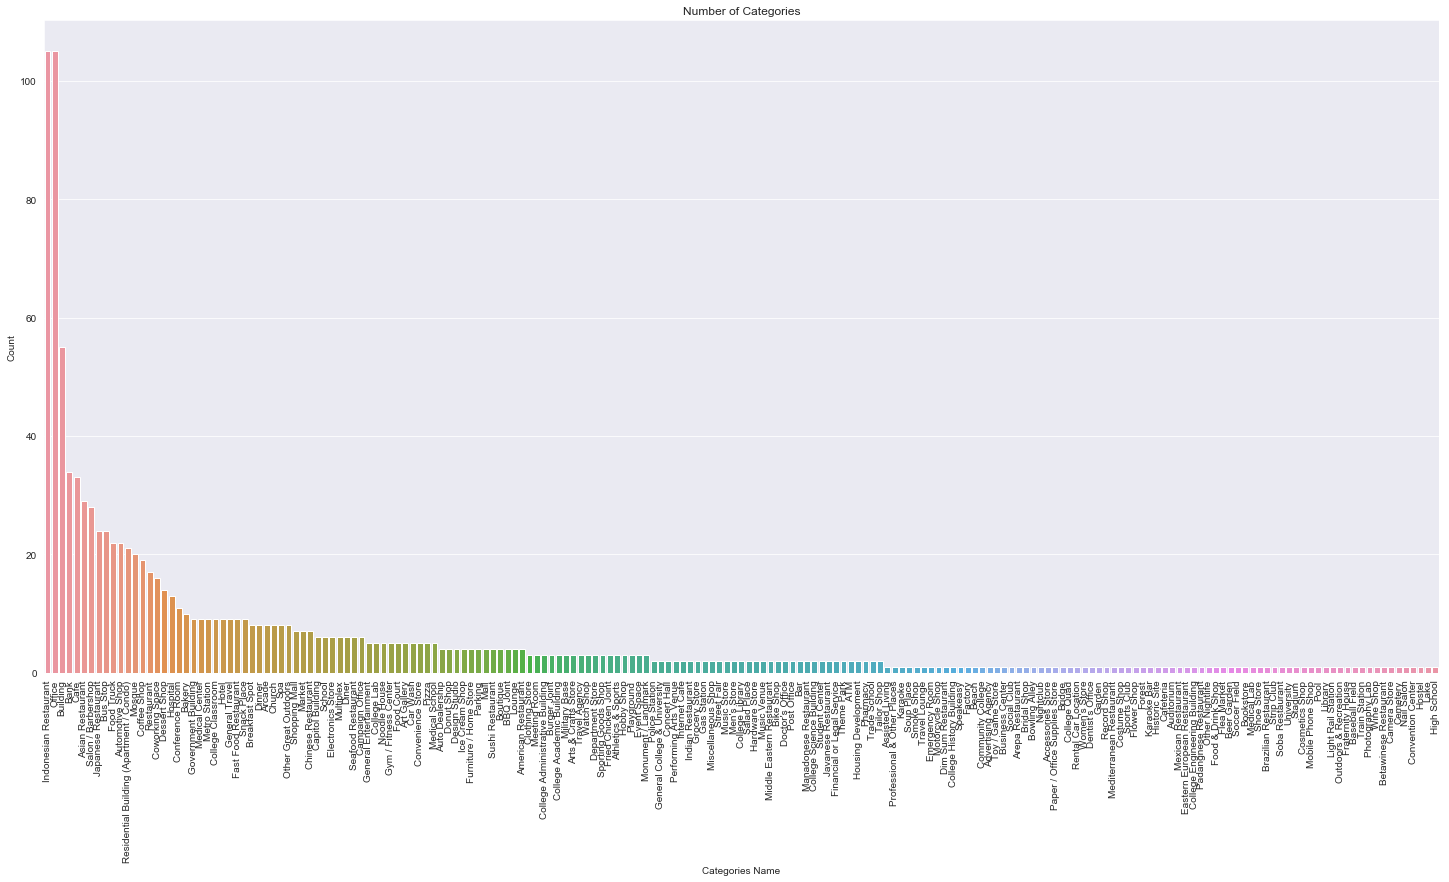

In [1805]:
#Let's Visualizeing the Categories!
plt.figure(figsize=(25,12))
sns.set_style("darkgrid")
sns.barplot(x=df_result['Categories'].value_counts().to_frame().index, y='Categories', data=df_result['Categories'].value_counts().to_frame())
plt.title('Number of Categories')
plt.xlabel('Categories Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#you can open image in new tab for better experience

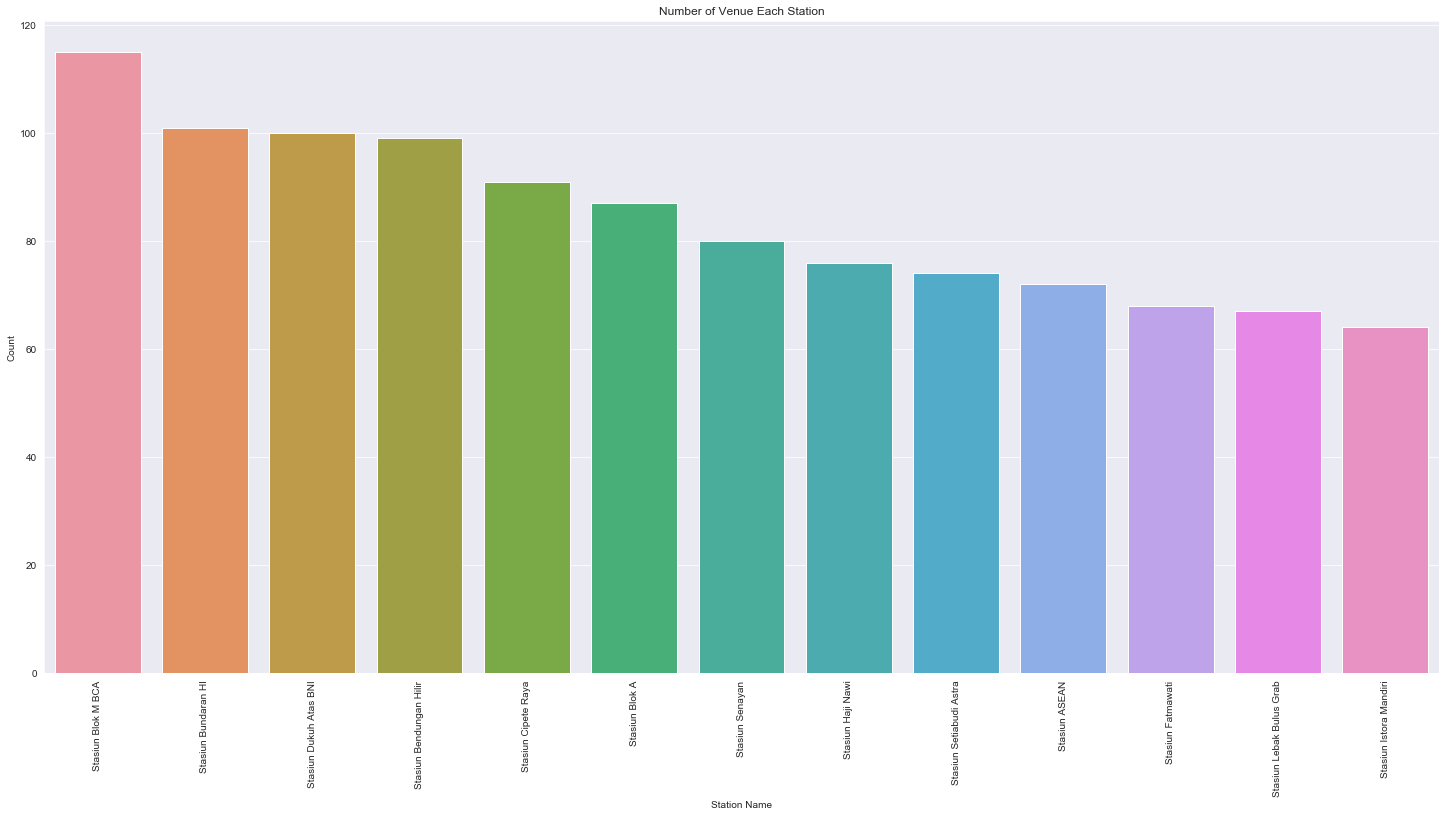

In [1840]:
#Let's Visualizeing the number of venues each station!
plt.figure(figsize=(25,12))
sns.set_style("darkgrid")
sns.barplot(x=df_result['Station Name'].value_counts().to_frame().index, y='Station Name', data=df_result['Station Name'].value_counts().to_frame())
plt.title('Number of Venue Each Station')
plt.xlabel('Station Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#you can open image in new tab for better experience

In [1841]:
# lets get the venue in red, and feature group of the station
for lat, lng, label in zip(df_result['Latitude'], df_result['Longitude'], df_result['Venue']):
    point_venues.append([lat, lng])
    folium.CircleMarker([lat, lng], radius=3, color='red', popup=label, fill = True, fill_color='red', fill_opacity=0.6).add_to(mrt_map_fixed)

mrt_map_fixed

In [1842]:
#we transform to one hot encoding, so the data become analyze able
one_hot_station = pd.concat([df_result['Station Name'],pd.get_dummies(df_result['Categories'])], axis=1)
display(one_hot_station.head())
print(one_hot_station.shape)

Station Name  ATM  Accessories Store  Advertising Agency  \
0  Stasiun Lebak Bulus Grab    0                  0                   0   
1  Stasiun Lebak Bulus Grab    0                  0                   0   
2  Stasiun Lebak Bulus Grab    0                  0                   0   
3  Stasiun Lebak Bulus Grab    0                  0                   0   
4  Stasiun Lebak Bulus Grab    0                  0                   0   

   American Restaurant  Arcade  Arepa Restaurant  Art Gallery  \
0                    0       0                 0            0   
1                    0       0                 0            0   
2                    0       0                 0            0   
3                    0       0                 0            0   
4                    0       0                 0            0   

   Arts & Crafts Store  Asian Restaurant  ...  Theme Park  Toy / Game Store  \
0                    0                 0  ...           0                 0   
1                    0                 0  ...           0                 0   
2                    0                 0  ...           0                 0   
3                    0                 0  ...           0                 0   
4                    0                 0  ...           0                 0   

   Trade School  Train Station  Travel Agency  Travel Lounge  University  \
0             0              0              0              0           0   
1             0              0              0              0           0   
2             0              0              0              0           0   
3             0              0              0              0           0   
4             0              0              0              0           0   

   Watch Shop  Wine Shop  Women's Store  
0           0          0              0  
1           0          0              0  
2           0          0              0  
3           0          0              0  
4           0          0              0  

[5 rows x 192 columns]

(1094, 192)


In [1867]:
#Group by station name
one_hot_station_grouped = one_hot_station.groupby(by=['Station Name']).max()
one_hot_station_grouped

ATM  Accessories Store  Advertising Agency  \
Station Name                                                           
Stasiun ASEAN               0                  0                   0   
Stasiun Bendungan Hilir     0                  0                   0   
Stasiun Blok A              0                  0                   0   
Stasiun Blok M BCA          0                  1                   0   
Stasiun Bundaran HI         1                  0                   1   
Stasiun Cipete Raya         0                  0                   0   
Stasiun Dukuh Atas BNI      0                  0                   0   
Stasiun Fatmawati           1                  0                   0   
Stasiun Haji Nawi           0                  0                   0   
Stasiun Istora Mandiri      0                  0                   0   
Stasiun Lebak Bulus Grab    0                  0                   0   
Stasiun Senayan             0                  0                   0   
Stasiun Setiabudi Astra     0                  0                   0   

                          American Restaurant  Arcade  Arepa Restaurant  \
Station Name                                                              
Stasiun ASEAN                               0       0                 0   
Stasiun Bendungan Hilir                     0       1                 0   
Stasiun Blok A                              0       1                 0   
Stasiun Blok M BCA                          1       1                 0   
Stasiun Bundaran HI                         1       1                 0   
Stasiun Cipete Raya                         0       0                 0   
Stasiun Dukuh Atas BNI                      0       0                 1   
Stasiun Fatmawati                           0       1                 0   
Stasiun Haji Nawi                           0       0                 0   
Stasiun Istora Mandiri                      1       0                 0   
Stasiun Lebak Bulus Grab                    0       0                 0   
Stasiun Senayan                             0       0                 0   
Stasiun Setiabudi Astra                     0       0                 0   

                          Art Gallery  Arts & Crafts Store  Asian Restaurant  \
Station Name                                                                   
Stasiun ASEAN                       0                    0                 0   
Stasiun Bendungan Hilir             0                    1                 1   
Stasiun Blok A                      1                    1                 1   
Stasiun Blok M BCA                  0                    1                 1   
Stasiun Bundaran HI                 1                    0                 1   
Stasiun Cipete Raya                 0                    0                 0   
Stasiun Dukuh Atas BNI              0                    0                 1   
Stasiun Fatmawati                   0                    0                 1   
Stasiun Haji Nawi                   0                    0                 1   
Stasiun Istora Mandiri              1                    0                 0   
Stasiun Lebak Bulus Grab            0                    0                 1   
Stasiun Senayan                     1                    0                 1   
Stasiun Setiabudi Astra             0                    0                 1   

                          Assisted Living  ...  Theme Park  Toy / Game Store  \
Station Name                               ...                                 
Stasiun ASEAN                           0  ...           0                 0   
Stasiun Bendungan Hilir                 0  ...           0                 0   
Stasiun Blok A                          0  ...           0                 0   
Stasiun Blok M BCA                      0  ...           0                 0   
Stasiun Bundaran HI                     0  ...           0                 0   
Stasiun Cipete Raya                     0  ...           0

In [1868]:
#lets see descriptive statistic
one_hot_station_grouped.describe()

ATM  Accessories Store  Advertising Agency  American Restaurant  \
count  13.000000          13.000000           13.000000            13.000000   
mean    0.153846           0.076923            0.076923             0.230769   
std     0.375534           0.277350            0.277350             0.438529   
min     0.000000           0.000000            0.000000             0.000000   
25%     0.000000           0.000000            0.000000             0.000000   
50%     0.000000           0.000000            0.000000             0.000000   
75%     0.000000           0.000000            0.000000             0.000000   
max     1.000000           1.000000            1.000000             1.000000   

          Arcade  Arepa Restaurant  Art Gallery  Arts & Crafts Store  \
count  13.000000         13.000000    13.000000            13.000000   
mean    0.384615          0.076923     0.307692             0.230769   
std     0.506370          0.277350     0.480384             0.438529   
min     0.000000          0.000000     0.000000             0.000000   
25%     0.000000          0.000000     0.000000             0.000000   
50%     0.000000          0.000000     0.000000             0.000000   
75%     1.000000          0.000000     1.000000             0.000000   
max     1.000000          1.000000     1.000000             1.000000   

       Asian Restaurant  Assisted Living  ...  Theme Park  Toy / Game Store  \
count         13.000000        13.000000  ...   13.000000         13.000000   
mean           0.769231         0.076923  ...    0.076923          0.076923   
std            0.438529         0.277350  ...    0.277350          0.277350   
min            0.000000         0.000000  ...    0.000000          0.000000   
25%            1.000000         0.000000  ...    0.000000          0.000000   
50%            1.000000         0.000000  ...    0.000000          0.000000   
75%            1.000000         0.000000  ...    0.000000          0.000000   
max            1.000000         1.000000  ...    1.000000          1.000000   

       Trade School  Train Station  Travel Agency  Travel Lounge  University  \
count     13.000000      13.000000      13.000000      13.000000   13.000000   
mean       0.153846       0.076923       0.153846       0.076923    0.076923   
std        0.375534       0.277350       0.375534       0.277350    0.277350   
min        0.000000       0.000000       0.000000       0.000000    0.000000   
25%        0.000000       0.000000       0.000000       0.000000    0.000000   
50%        0.000000       0.000000       0.000000       0.000000    0.000000   
75%        0.000000       0.000000       0.000000       0.000000    0.000000   
max        1.000000       1.000000       1.000000       1.000000    1.000000   

       Watch Shop  Wine Shop  Women's Store  
count   13.000000  13.000000      13.000000  
mean     0.153846   0.076923       0.076923  
std      0.375534   0.277350       0.277350  
min      0.000000   0.000000       0.000000  
25%      0.000000   0.000000       0.000000  
50%      0.000000   0.000000       0.000000  
75%      0.000000   0.000000       0.000000  
max      1.000000   1.000000       1.000000  

[8 rows x 191 columns]

In [1869]:
#now we fetch all columns name for user see below!
user_col = []
user_col = user_col + ['Username'] + one_hot_station_grouped.columns.to_list()[1:]
print(user_col)

['Username', 'Accessories Store', 'Advertising Agency', 'American Restaurant', 'Arcade', 'Arepa Restaurant', 'Art Gallery', 'Arts & Crafts Store', 'Asian Restaurant', 'Assisted Living', 'Athletics & Sports', 'Auditorium', 'Auto Dealership', 'Automotive Shop', 'BBQ Joint', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Beach', 'Beer Garden', 'Betawinese Restaurant', 'Bike Shop', 'Bookstore', 'Boutique', 'Bowling Alley', 'Brazilian Restaurant', 'Breakfast Spot', 'Bridal Shop', 'Bridge', 'Building', 'Burger Joint', 'Bus Stop', 'Business Center', 'Cafe', 'Cafeteria', 'Camera Store', 'Campaign Office', 'Capitol Building', 'Car Wash', 'Cemetery', 'Chinese Restaurant', 'Church', 'Clothing Store', 'Coffee Shop', 'College Academic Building', 'College Administrative Building', 'College Classroom', 'College Engineering Building', 'College History Building', 'College Lab', 'College Library', 'College Quad', 'College Science Building', 'Community College', 'Concert Hall', 'Conference Room', 'Convenien

In [1871]:
#Initialization of dataframe user
df_user = pd.DataFrame(columns=user_col)
df_user

Empty DataFrame
Columns: [Username, Accessories Store, Advertising Agency, American Restaurant, Arcade, Arepa Restaurant, Art Gallery, Arts & Crafts Store, Asian Restaurant, Assisted Living, Athletics & Sports, Auditorium, Auto Dealership, Automotive Shop, BBQ Joint, Bakery, Bank, Bar, Baseball Field, Beach, Beer Garden, Betawinese Restaurant, Bike Shop, Bookstore, Boutique, Bowling Alley, Brazilian Restaurant, Breakfast Spot, Bridal Shop, Bridge, Building, Burger Joint, Bus Stop, Business Center, Cafe, Cafeteria, Camera Store, Campaign Office, Capitol Building, Car Wash, Cemetery, Chinese Restaurant, Church, Clothing Store, Coffee Shop, College Academic Building, College Administrative Building, College Classroom, College Engineering Building, College History Building, College Lab, College Library, College Quad, College Science Building, Community College, Concert Hall, Conference Room, Convenience Store, Convention Center, Cosmetics Shop, Costume Shop, Coworking Space, Dentist's Office, Department Store, Design Studio, Dessert Shop, Dim Sum Restaurant, Diner, Dinner, Doctor's Office, Donut Shop, Eastern European Restaurant, Electronics Store, Emergency Room, Event Space, Factory, Fast Food Restaurant, Financial or Legal Service, Flea Market, Flower Shop, Food & Drink Shop, Food Court, Food Truck, Forest, Fraternity House, Fried Chicken Joint, Furniture / Home Store, Garden, Gas Station, General College & University, General Entertainment, General Travel, Government Building, Grocery Store, Gym / Fitness Center, Hardware Store, High School, Historic Site, Hobby Shop, Hospital, ...]
Index: []

[0 rows x 191 columns]

In [1872]:
#We give value for the first user
df_user.loc[0] = [0 for a_row in user_col]
df_user

Username Accessories Store Advertising Agency American Restaurant Arcade  \
0        0                 0                  0                   0      0   

  Arepa Restaurant Art Gallery Arts & Crafts Store Asian Restaurant  \
0                0           0                   0                0   

  Assisted Living  ... Theme Park Toy / Game Store Trade School Train Station  \
0               0  ...          0                0            0             0   

  Travel Agency Travel Lounge University Watch Shop Wine Shop Women's Store  
0             0             0          0          0         0             0  

[1 rows x 191 columns]

In [1887]:
#We customize based on Nancy's need 
df_user.loc[0][['Username', 'Gym / Fitness Center', 'Pool','Market', 'Coffee Shop']] = ['Nancy',1,1,1,1]
U = df_user.loc[0][['Gym / Fitness Center', 'Pool','Market', 'Coffee Shop']].values
U = U.reshape(1,-1)
U

array([[1, 1, 1, 1]], dtype=object)

In [1888]:
S = one_hot_station_grouped[['Gym / Fitness Center', 'Pool','Market', 'Coffee Shop']].values
S

array([[0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

#Cosine Similarity

In [1678]:
list_a = np.array([[1,1,1,0]])
list_b = np.array([[1,1,1,0]])
list_c = np.array([[1,1,1,1]])

print(cosine_similarity(list_a, list_b))
print(cosine_similarity(list_a, list_c))
#the theory is just comparing 2 variable and find similarities

[[1.]]
[[0.8660254]]


With cosine similarity, user table will find similarity with station that have preferenced venues and the result will be list of all station that match criteria

In [1889]:
list_cos = []
for oo in cosine_similarity(U, S).tolist()[0]:
    list_cos.append(oo)


list_cos = np.array(list_cos)
list_cos

array([0.5       , 0.70710678, 0.5       , 0.5       , 0.70710678,
       0.5       , 0.70710678, 0.5       , 0.70710678, 0.        ,
       1.        , 0.5       , 0.5       ])

In [1895]:
#let transform to DataFrame
pd.DataFrame({'Station Name':one_hot_station_grouped.index.values, 'Accuracy': list_cos*100})\
.sort_values(by=('Accuracy'), ascending=False)

Station Name    Accuracy
10  Stasiun Lebak Bulus Grab  100.000000
1    Stasiun Bendungan Hilir   70.710678
4        Stasiun Bundaran HI   70.710678
6     Stasiun Dukuh Atas BNI   70.710678
8          Stasiun Haji Nawi   70.710678
0              Stasiun ASEAN   50.000000
2             Stasiun Blok A   50.000000
3         Stasiun Blok M BCA   50.000000
5        Stasiun Cipete Raya   50.000000
7          Stasiun Fatmawati   50.000000
11           Stasiun Senayan   50.000000
12   Stasiun Setiabudi Astra   50.000000
9     Stasiun Istora Mandiri    0.000000

Never trus your found!!! since Recomender System is unsupervise machine learning, we should check the result can be accepted or not. let use Folium again to check!

In [1971]:
df_lebak_bulus = df_result[df_result['Station Name'] == 'Stasiun Lebak Bulus Grab']
df_check = df_lebak_bulus[(df_lebak_bulus['Categories'] == 'Market') | \
               (df_lebak_bulus['Categories'] == 'Pool') | \
               (df_lebak_bulus['Categories'] == 'Gym / Fitness Center') |\
               (df_lebak_bulus['Categories'] == 'Coffee Shop')]

display(df_check)
print()
mrt_lebak_bulus = [-6.2892713,106.7705427]
map_mrt_lebak_bulus = peta(mrt_lebak_bulus, 25)
folium.CircleMarker(mrt_lebak_bulus,radius=5,color='yellow', fill = True, fill_color='blue', fill_opacity=0.6).add_to(map_mrt_lebak_bulus)
folium.Marker(mrt_lebak_bulus, popup='Stasiun Lebak Bulus Grab').add_to(map_mrt_lebak_bulus) 

#is our recomender system true? let's find out!
for venue_name, venue_latitude, venue_longitude in zip(df_check['Venue'], df_check['Latitude'], df_check['Longitude']):
    #red dot for venue
    folium.CircleMarker([venue_latitude, venue_longitude],radius=3, color='red', fill = False,).\
    add_child(folium.Popup(venue_name)).add_to(map_mrt_lebak_bulus)
    #Line
    lines = [mrt_lebak_bulus[:]]
    lines.append([venue_latitude, venue_longitude])
    folium.PolyLine(lines, color="black", weight=2.5, opacity=1).add_to(map_mrt_lebak_bulus)
    #we emptying again!
    lines = [mrt_lebak_bulus[:]]
    
map_mrt_lebak_bulus

Station Name  \
12   Stasiun Lebak Bulus Grab   
18   Stasiun Lebak Bulus Grab   
58   Stasiun Lebak Bulus Grab   
65   Stasiun Lebak Bulus Grab   
85   Stasiun Lebak Bulus Grab   
115  Stasiun Lebak Bulus Grab   

                                                 Venue            Categories  \
12                        Coffe toffee Pejaten village           Coffee Shop   
18                                         Pasar Jumat                Market   
58                                       Golds Gym Bxc  Gym / Fitness Center   
65                                 Selapa/Sespimma Gym  Gym / Fitness Center   
85                     sport club pondok chandra indah                  Pool   
115  Starbucks Coffee rest. area KM 19 Tol Jakarta ...           Coffee Shop   

     Latitude   Longitude  
12  -6.289001  106.770839  
18  -6.289220  106.771202  
58  -6.289728  106.771191  
65  -6.288732  106.770908  
85  -6.289001  106.770640  
115 -6.289543  106.771012

In [1972]:
#lets check istora with 0% Accuracy!
df_istora = df_result[df_result['Station Name'] == 'Stasiun Istora Mandiri']
df_check_0 = df_istora[(df_lebak_bulus['Categories'] == 'Market') | \
               (df_istora['Categories'] == 'Pool') | \
               (df_istora['Categories'] == 'Gym / Fitness Center') |\
               (df_istora['Categories'] == 'Coffee Shop')]

display(df_check_0)
print()
mrt_istora = [-6.222360,	106.806396]
map_mrt_istora = peta(mrt_istora, 25)
folium.CircleMarker(mrt_istora,radius=5,color='yellow', fill = True, fill_color='blue', fill_opacity=0.6).add_to(map_mrt_istora)
folium.Marker(mrt_istora, popup='Stasiun Istora Mandiri').add_to(map_mrt_istora) 

map_mrt_istora

C:\Users\Jey\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Empty DataFrame
Columns: [Station Name, Venue, Categories, Latitude, Longitude]
Index: []

Based on our recomender system, Nancy should live near Stasiun Lebak Bulus Grab, because it have all of Nancy's preferred venues with 100% Accuracy, and Nancy should not choose to live near Stasiun Istora Mandiri because it had 0% Accuracy. 